# **1. Préparation de l'environnement**

In [45]:
#Importation
import cv2
from google.colab.patches import cv2_imshow

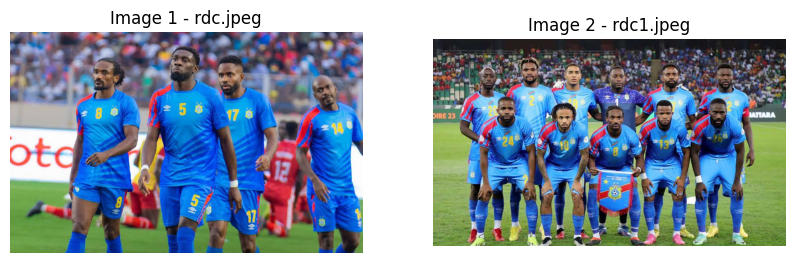

In [52]:
# Importer les bibliothèques nécessaires
import cv2
import matplotlib.pyplot as plt

# Charger les images
image1 = cv2.imread("/content/drive/MyDrive/Colab Notebooks/Knowledge/Reconnaissance de visa/dataset/rdc.jpeg")
image2 = cv2.imread("/content/drive/MyDrive/Colab Notebooks/Knowledge/Reconnaissance de visa/dataset/rdc2.jpeg")

# Convertir les images en RGB pour l'affichage avec Matplotlib
image1_rgb = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image2_rgb = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

# Afficher les images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image1_rgb)
plt.title("Image 1 - rdc.jpeg")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(image2_rgb)
plt.title("Image 2 - rdc1.jpeg")
plt.axis("off")
plt.show()


# **2. Charger le modèle de détection des visages**

In [53]:
# Télécharger le fichier Haar Cascade (si non déjà disponible)
!wget https://github.com/opencv/opencv/raw/master/data/haarcascades/haarcascade_frontalface_default.xml

# Charger le classifieur Haar Cascade
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# Vérifier si le classifieur a été chargé
if face_cascade.empty():
    print("Erreur : Classifieur non chargé.")
else:
    print("Classifieur chargé avec succès.")


--2024-12-24 09:20:48--  https://github.com/opencv/opencv/raw/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml [following]
--2024-12-24 09:20:48--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml.2’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.06s   

20

# **3. Détection des visages**

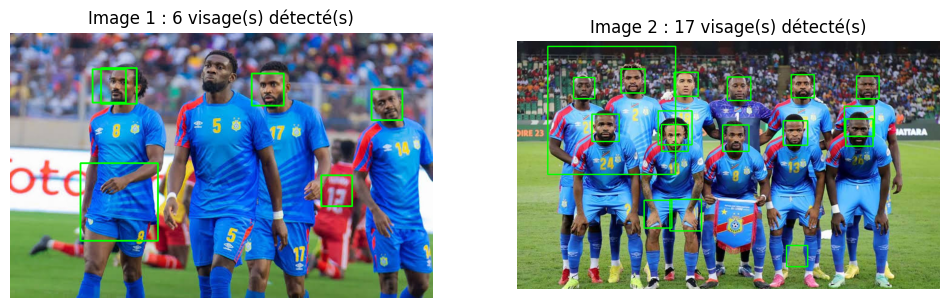

In [57]:
from mtcnn import MTCNN
import cv2
import matplotlib.pyplot as plt

# Fonction ajustée pour détecter les visages, y compris les petits visages
def detect_faces(image, cascade, scaleFactor=1.05, minNeighbors=3, minSize=(20, 20)):
    """
    Détecte les visages dans une image et dessine des rectangles autour des visages détectés.

    Args:
    - image : Image d'entrée.
    - cascade : Classifieur Haar pour la détection de visages.
    - scaleFactor : Paramètre pour l'échelle pyramidale.
    - minNeighbors : Nombre minimum de voisins requis pour retenir une détection.
    - minSize : Taille minimale d'un visage à détecter.

    Returns:
    - image avec rectangles autour des visages.
    - Liste des coordonnées des visages détectés.
    """
    # Convertir l'image en niveaux de gris
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Détecter les visages avec les paramètres ajustés
    faces = cascade.detectMultiScale(
        gray_image,
        scaleFactor=scaleFactor,
        minNeighbors=minNeighbors,
        minSize=minSize
    )

    # Dessiner des rectangles autour des visages détectés
    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Rectangle bleu

    return image, faces

# Détecter les visages avec les nouveaux paramètres
image1_faces, faces1 = detect_faces(image1.copy(), face_cascade, scaleFactor=1.05, minNeighbors=3, minSize=(20, 20))
image2_faces, faces2 = detect_faces(image2.copy(), face_cascade, scaleFactor=1.05, minNeighbors=3, minSize=(20, 20))

# Convertir en RGB pour l'affichage
image1_faces_rgb = cv2.cvtColor(image1_faces, cv2.COLOR_BGR2RGB)
image2_faces_rgb = cv2.cvtColor(image2_faces, cv2.COLOR_BGR2RGB)

# Afficher les résultats
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.imshow(image1_faces_rgb)
plt.title(f"Image 1 : {len(faces1)} visage(s) détecté(s)")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(image2_faces_rgb)
plt.title(f"Image 2 : {len(faces2)} visage(s) détecté(s)")
plt.axis("off")
plt.show()


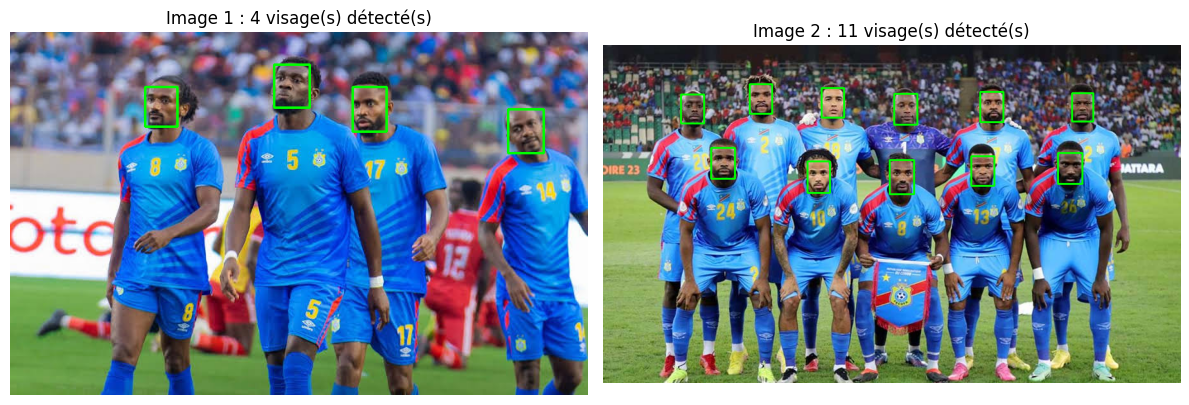

In [56]:

# Fonction pour détecter et dessiner des visages tout en conservant les couleurs
def detect_and_draw_faces(image_path):
    # Lire l'image
    image = cv2.imread(image_path)  # Lire en BGR
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convertir en RGB pour affichage et MTCNN
    image_copy = image_rgb.copy()  # Faire une copie pour dessiner sans altérer l'original

    # Initialiser le détecteur MTCNN
    detector = MTCNN()

    # Détection des visages
    faces = detector.detect_faces(image_rgb)

    # Dessiner des rectangles autour des visages détectés
    for face in faces:
        x, y, width, height = face['box']
        cv2.rectangle(image_copy, (x, y), (x + width, y + height), (0, 255, 0), 2)  # Rectangle vert

    return image_copy, len(faces)

# Chemins des deux images
image_path1 = "/content/drive/MyDrive/Colab Notebooks/Knowledge/Reconnaissance de visa/dataset/rdc.jpeg"  # Remplacez avec votre chemin
image_path2 = "/content/drive/MyDrive/Colab Notebooks/Knowledge/Reconnaissance de visa/dataset/rdc2.jpeg"  # Remplacez avec le chemin de la deuxième image

# Appliquer la fonction sur les deux images
image1_with_faces, faces_count1 = detect_and_draw_faces(image_path1)
image2_with_faces, faces_count2 = detect_and_draw_faces(image_path2)

# Afficher les deux images côte à côte
plt.figure(figsize=(12, 6))

# Image 1
plt.subplot(1, 2, 1)
plt.imshow(image1_with_faces)
plt.axis("off")
plt.title(f"Image 1 : {faces_count1} visage(s) détecté(s)")

# Image 2
plt.subplot(1, 2, 2)
plt.imshow(image2_with_faces)
plt.axis("off")
plt.title(f"Image 2 : {faces_count2} visage(s) détecté(s)")

plt.tight_layout()
plt.show()
